In [64]:
import lucem_illud_2020 #pip install git+git://github.com/Computational-Content-Analysis-2020/lucem_illud_2020.git

#All these packages need to be installed from pip
import requests #for http requests
import pandas as pd #gives us DataFrames
import matplotlib.pyplot as plt #For graphics
import wordcloud #Makes word clouds
import numpy as np #For divergences/distances
import scipy #For divergences/distances
import seaborn as sns #makes our plots look nicer
import sklearn.manifold #For a manifold plot
import json #For API responses
import urllib.parse #For joining urls
import bs4 #called `beautifulsoup4`, an html parser

# comp-linguistics
import spacy

#Displays the graphs
import graphviz #You also need to install the command line graphviz

#These are from the standard library
import os.path
import zipfile
import subprocess
import io
import tempfile

#These come with Python
import re #for regexs
import urllib.parse #For joining urls
import io #for making http requests look like files
import json #For Tumblr API responses
import os.path #For checking if files exist
import os #For making directories

In [35]:
import importlib
import counting_words as count
import data_ingest as ingest

In [55]:
importlib.reload(ingest)
importlib.reload(count)

<module 'counting_words' from '/Users/daminisharma/Dropbox/Harris MSCAPP/2019-20_Q3_Spring/Content Analysis/american-prison-writing_nlp/analysis/counting_words.py'>

In [37]:
data_directory = '../data/'
filename = 'APW_all_attributes_final.csv'
df = ingest.load_prep_data(data_directory+filename)
df.head(2)

,url,title,text,date_written,pages,ethnicity,gender,sexual_orientation,state,relation_to_prison
0,/islandora/object/apw%3A12341395?solr_nav%5Bid...,A person cannot become who they need to be by ...,A PERSON CANNOT BECOME WHO THEY NEED TO BE BY...,2014-03-18,2 pages,White (non-Hispanic),Male,Heterosexual,Indiana,Death Row Prisoner
1,/islandora/object/apw%3A12341549?solr_nav%5Bid...,It is good justice is blind because she would ...,It is Good Justice is Blind Because She Would ...,2014-03-18,2 pages,White (non-Hispanic),Male,Heterosexual,Indiana,Death Row Prisoner


In [38]:
df = ingest.agg_groups(df, 'ethnicity','race_agg',['African American','Latina/o / Hispanic','Multiracial','No information','White (non-Hispanic)'])


In [58]:
df = ingest.agg_groups(df, 'gender','gender_agg',['Female','Male','No Information'])



In [62]:
df.groupby('relation_to_prison').count()

,url,title,text,date_written,pages,ethnicity,gender,sexual_orientation,state,race_agg,tokenized_text,normalized_text,gender_agg
relation_to_prison,,,,,,,,,,,,,
Death Row Prisoner,5,5,5,5,5,5,5,5,5,5,5,5,5
Former Prisoner,8,8,8,8,8,8,8,8,8,8,8,8,8
Formerly incarcerated,24,24,24,24,24,24,24,24,24,24,24,24,24
Hostage,1,1,1,1,1,1,1,1,1,1,1,1,1
Incarcerated,1951,1951,1951,830,1951,1949,1951,1947,1951,1951,1951,1951,1951
Life Prisoner,2,2,2,1,2,2,2,2,2,2,2,2,2
No information,80,80,80,36,80,78,80,80,80,80,80,80,80
Non-consensual prisoner,1,1,1,1,1,1,1,1,1,1,1,1,1
Other,6,6,6,4,6,6,6,6,6,6,6,6,6


In [40]:
df = ingest.norm_text(df)


In [65]:
df = ingest.norm_sent(df)

In [41]:
df.head(2)

,url,title,text,date_written,pages,ethnicity,gender,sexual_orientation,state,relation_to_prison,race_agg,tokenized_text,normalized_text
0,/islandora/object/apw%3A12341395?solr_nav%5Bid...,A person cannot become who they need to be by ...,A PERSON CANNOT BECOME WHO THEY NEED TO BE BY...,2014-03-18,2 pages,White (non-Hispanic),Male,Heterosexual,Indiana,Death Row Prisoner,White (non-Hispanic),"[A, PERSON, CANNOT, BECOME, WHO, THEY, NEED, T...","[person, need, remain, wesley, purkey, federal..."
1,/islandora/object/apw%3A12341549?solr_nav%5Bid...,It is good justice is blind because she would ...,It is Good Justice is Blind Because She Would ...,2014-03-18,2 pages,White (non-Hispanic),Male,Heterosexual,Indiana,Death Row Prisoner,White (non-Hispanic),"[It, is, Good, Justice, is, Blind, Because, Sh...","[good, justice, blind, like, thing, wesley, pu..."


In [53]:
wordCounts = count.wordCounter(df['normalized_text'])

In [63]:
wordCounts.head(10)

,word,count
833,prison,15959
162,time,9107
53,year,7478
904,prisoner,6934
80,life,6625
241,inmate,6449
430,state,6414
149,people,6300
1025,have,6135
296,s,5963


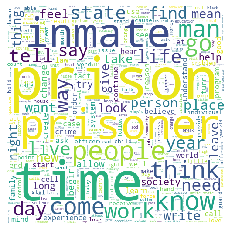

In [56]:
count.word_cloud(df['normalized_text'])

In [97]:
len(corpora)

6

In [98]:
#corpora

In [99]:
nlp = spacy.load("en")

In [105]:
nlp.max_length = 5030000 # or even higher 2,573,822 1,000,000

In [106]:
# aggregate texts by group:
df_agg_text = pd.DataFrame(df.groupby('race_agg')['normalized_text'].sum())

corpora = []
for index, row in df_agg_text.iterrows():
    corpora.append(row['normalized_text'])

# corpora_nons = []
# for corpus in corpora:
#     nons = []
#     doc = nlp(' '.join(corpus),disable = ['ner', 'parser'])
#     for word in doc:
#         nons.append(word.text)
#     corpora_nons.append(nons)
fileids = list(df.index)

TypeError: 'list' object is not callable

In [109]:
fileids = df_agg_text.index.tolist()

In [110]:
fileids

['African American',
 'Latina/o / Hispanic',
 'Multiracial',
 'No information',
 'Other',
 'White (non-Hispanic)']

In [114]:
# for x in corpora:
#     print(type(x))

#corpora[:1]

In [76]:
fileids = df_agg_text.index

In [85]:
type(df_agg_text)

pandas.core.frame.DataFrame

In [86]:
for x in df_agg_text:
    print(x)

normalized_text


In [115]:
freqP = nltk.FreqDist(corpora[1])

In [127]:
list1 = list(freqP.values())

In [126]:
#list
del list

In [117]:
P = pd.DataFrame(list(freqP.values()), columns = ['frequency'], index = list(freqP.keys()))


TypeError: 'list' object is not callable

In [116]:
type(freqP)

nltk.probability.FreqDist

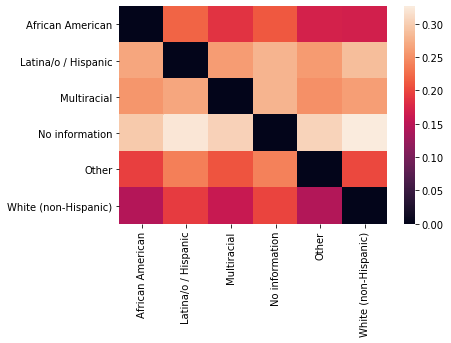

In [128]:
L = []
for p in corpora:
    l = []
    for q in corpora:
        l.append(Divergence(p,q, difference = 'KL'))
    L.append(l)
M = np.array(L)
fig = plt.figure()
div = pd.DataFrame(M, columns = fileids, index = fileids)
ax = sns.heatmap(div)
plt.show()